# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


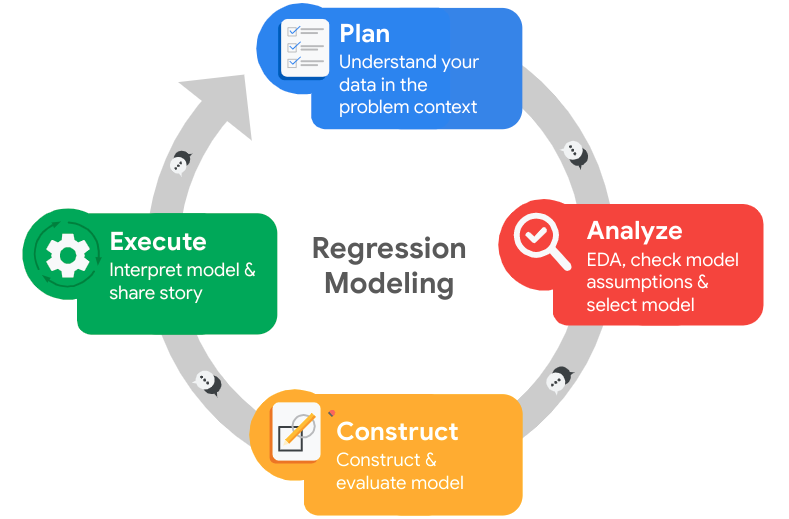

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?

The primary audience for this project is Salifort Motors’ senior leadership team, including Human Resources and Operations executives.

- What are you trying to solve or accomplish?

Salifort Motors is experiencing a high rate of employee turnover. The HR department wants to understand the key factors that drive employee departures and develop a predictive model that can identify employees who are at risk of leaving. This will enable proactive retention strategies and data-driven decision-making.

- What are your initial observations when you explore the data?

When exploring the dataset, I observed that each variable appears to play an important role in predicting the target variable. the data suggests that a combination of performance, workload, satisfaction, and compensation metrics are likely to be strong predictors of whether an employee will leave the company.

- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)

Python and Data Science Libraries

https://pandas.pydata.org/docs/ — for data cleaning, inspection, and manipulation.

https://matplotlib.org/stable/gallery/index.html
 and https://seaborn.pydata.org/
 — for data visualization and pattern recognition.

https://scikit-learn.org/stable/documentation.html — to review preprocessing and model-building techniques.

Google Advanced Data Analytics Course Resources

https://www.coursera.org/professional-certificates/google-advanced-data-analytics — provided the structured framework for performing data exploration and modeling.

Best Practice Articles and References

https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15 — for EDA workflow inspiration.

https://www.kaggle.com/datasets — for benchmarking insights and EDA approaches.
 
- Do you have any ethical considerations in this stage?

1. Data Privacy and Anonymity

Ensure all employee data is anonymized. Personally identifiable information (PII) such as names, contact details, or IDs should never be included or shared.

Analysis must focus solely on aggregated, de-identified data.

2. Fairness and Bias

Models must not introduce or reinforce bias related to salary, department, or other demographic attributes.

The goal is to use the model to support fairness and equity, not penalize any specific employee group.


3. Responsible Use of Predictions

Predictions about turnover should be used to improve workplace conditions, not to discriminate or take preemptive negative actions against employees.

Communication of results should emphasize proactive support (training, recognition, workload balance) rather than punitive outcomes.




## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import pandas as pd                
import numpy as np                 

# Visualization
import matplotlib.pyplot as plt    
import seaborn as sns             

# Machine learning models
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.tree import DecisionTreeClassifier, plot_tree          
from sklearn.ensemble import RandomForestClassifier                 
from xgboost import XGBClassifier                                   

# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0.rename(columns={
    'satisfaction_level': 'satisfaction_level',
    'last_evaluation': 'last_evaluation',
    'number_project': 'num_projects',
    'average_monthly_hours': 'avg_monthly_hours',
    'time_spend_company': 'years_at_company',
    'Work_accident': 'work_accident',
    'left': 'left',
    'promotion_last_5years': 'promotion_last_5yrs',
    'Department': 'department',
    'salary': 'salary'
}, inplace=True)


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'num_projects',
       'average_montly_hours', 'years_at_company', 'work_accident', 'left',
       'promotion_last_5yrs', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isnull().sum()


satisfaction_level      0
last_evaluation         0
num_projects            0
average_montly_hours    0
years_at_company        0
work_accident           0
left                    0
promotion_last_5yrs     0
department              0
salary                  0
dtype: int64

There aren't any missing values within the data

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
duplicates = df0.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 3008


20% of the data contains duplicates 

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head(10)


,satisfaction_level,last_evaluation,num_projects,average_montly_hours,years_at_company,work_accident,left,promotion_last_5yrs,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df_clean = df0.drop_duplicates()



# Display first few rows of new dataframe as needed
df_clean.head()


,satisfaction_level,last_evaluation,num_projects,average_montly_hours,years_at_company,work_accident,left,promotion_last_5yrs,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

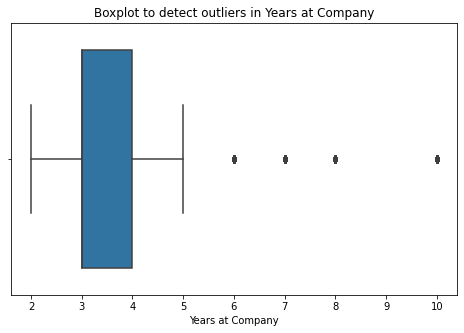

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_clean['years_at_company'])
plt.title('Boxplot to detect outliers in Years at Company')
plt.xlabel('Years at Company')
plt.show()


This boxplot shows that there are outliers in years at company. Those outlliers are those who've been employeed with the company for 6 to 10 years.

In [12]:
# Determine the number of rows containing outliers
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_clean['years_at_company'].quantile(0.25)
Q3 = df_clean['years_at_company'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Determine number of rows containing outliers
outliers = df_clean[(df_clean['years_at_company'] < lower_bound) | (df_clean['years_at_company'] > upper_bound)]
print("Number of rows containing outliers in 'years_at_company':", outliers.shape[0])



Number of rows containing outliers in 'years_at_company': 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?

Satisfaction vs. Last Evaluation:

Row 2 has very low satisfaction (11%) but an extremely high evaluation (88%). This indicates a possible mismatch between employee satisfaction and performance review, which may signal high turnover risk despite strong performance.

Row 1 shows both high satisfaction (80%) and high evaluation (0.86), likely representing a stable, satisfied employee.

Workload vs. Turnover Risk:

Rows 1, 2, and 3 have high monthly hours (223–272) and high project count (5–7). Combined with satisfaction levels, this suggests that overworked employees may leave even if performance is high.

Tenure vs. Turnover:

Most employees have 3–5 years of tenure, consistent with earlier observations that turnover often occurs in the first few years or among mid-tenure employees with high workload/stress.

Salary vs. Department:

Row 2 and 1 are in sales but have medium salary, while row 3 is in sales with low salary. This suggests that salary might moderate the effect of workload and satisfaction on turnover, but is not the sole factor.

- What do you observe about the distributions in the data?

2. Observations About Distributions

Satisfaction Level: Most employees have moderate satisfaction (0.37–0.38), with outliers like 11% (row 2) and 80% (row 1).

Last Evaluation: High overall (52%-88%), skewed toward higher performance scores.

Number of Projects: Ranges from 2–7, with higher project counts corresponding to higher monthly hours.

Average Monthly Hours: Right-skewed distribution, with extreme values (262–272) indicating overworked employees.

Tenure: Clustered around 3–5 years; consistent with boxplot findings.

Salary: Mostly low/medium; imbalanced distribution.

- What transformations did you make with your data? Why did you chose to make those decisions?

1. Renamed Columns

Converted all column names to snake_case (e.g., number_project → num_projects,  average_monthly_hours → avg_monthly_hours) for consistency and readability.

Ensures the dataset follows best practices for Python variable naming and avoids errors during modeling.

2. Dropped Duplicate Rows

Removed exact duplicates to prevent biasing the model with repeated data points.

Preserved the original dataset in a new variable (df_clean) for reference.

3. Checked for Outliers

Used IQR method to identify outliers in years_at_company (tenure) and other numeric variables.

Chose not to remove them, because tree-based models like Decision Trees, Random Forest, and XGBoost are robust to extreme values. Outliers may contain valuable predictive information about employee turnover.


- What are some purposes of EDA before constructing a predictive model?

identify data quality issues, understand distributions of variables, discover relationships between variables, detect outliers and gain business outsight

- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)

https://www.kaggle.com/learn/pandas
https://www.coursera.org/professional-certificates/google-advanced-data-analytics

- Do you have any ethical considerations in this stage?

1. Fairness and Bias

Be cautious about introducing bias during preprocessing, especially when handling variables like department, salary, or tenure.

Avoid transformations or exclusions that could unintentionally favor or discriminate against a particular group of employees.

2. Responsible Use of Insights

Insights from the data should be used to improve employee retention and satisfaction, not to penalize or target specific employees.

Recommendations should focus on supportive interventions, such as workload adjustments or career development opportunities.

3. Compliance with Policies and Laws

Ensure analysis complies with labor laws, data protection regulations, and company policies regarding employee data.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
left_counts = df_clean['left'].value_counts()
print("Counts of employees who left vs. stayed:")
print(left_counts)

# Get percentages of people who left vs. stayed
left_percentages = df_clean['left'].value_counts(normalize=True) * 100
print("\nPercentages of employees who left vs. stayed:")
print(left_percentages.round(2))


Counts of employees who left vs. stayed:
0    10000
1     1991
Name: left, dtype: int64

Percentages of employees who left vs. stayed:
0    83.4
1    16.6
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

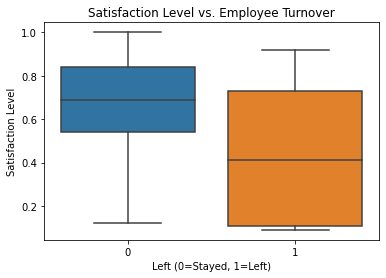

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x='left', y='satisfaction_level', data=df_clean)
plt.title('Satisfaction Level vs. Employee Turnover')
plt.xlabel('Left (0=Stayed, 1=Left)')
plt.ylabel('Satisfaction Level')
plt.show()


## Key Insights 


###  Employees Who Stayed (`stayed = 0`, Blue Box)
Employees who stayed with the company generally show **high and steady satisfaction levels**. The **median satisfaction score is around 0.70**, meaning half of these employees rate their satisfaction at 70% or below. This is a healthy midpoint that reflects overall contentment among retained staff.  

The middle 50% of these employees fall between **0.55 and 0.85**, showing that satisfaction levels are fairly consistent and tightly clustered. This limited spread suggests that most of the team feels stable and reasonably happy in their roles. Even the lowest observed satisfaction, around **0.12**, appears to be more of an exception than the norm.  

In short, this group reflects **strong employee engagement** and steady morale — two traits commonly found in teams with low turnover.

---

###  Employees Who Left (`left = 1`, Orange Box)
In contrast, employees who left show **much lower and more scattered satisfaction levels**. The **median satisfaction** for this group is **0.41**, which means half of the employees who left were less than 41% satisfied.  

The spread between **0.10 and 0.73** is much wider than in the group that stayed, suggesting two distinct clusters: one group that was **very dissatisfied** (around 0.10), and another that was **moderately satisfied** (up to 0.73). About 25% of these employees had satisfaction scores of **0.10 or below**, which represents a highly disengaged segment. Interestingly, some employees with satisfaction as high as 0.73 also chose to leave — suggesting that **moderate satisfaction alone isn’t enough to guarantee retention**.  

This wider variation points to a mix of underlying factors influencing turnover, such as unmet expectations, lack of growth opportunities, or external job offers.


The difference between the two groups is clear: employees who stayed have a **median satisfaction of 0.70**, while those who left sit much lower at **0.41**.  

This confirms that **low satisfaction is the single biggest risk factor for employee turnover**. In short, investing in recognition, growth, and a positive culture isn’t just good practice, it’s a measurable way to reduce turnover and strengthen employee loyalty.

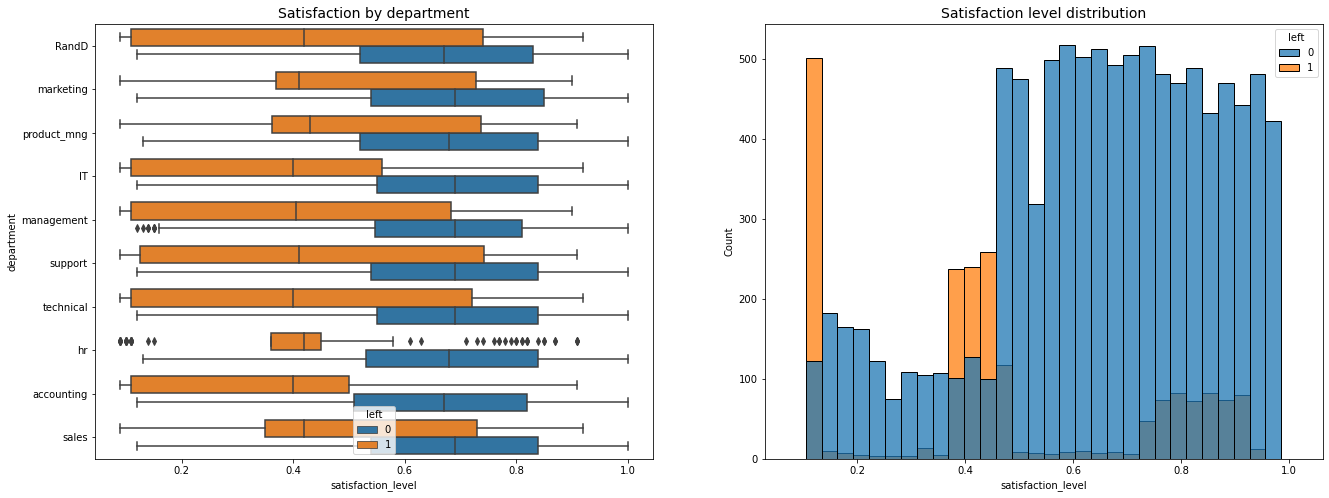

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(22,8))

# Boxplot
sns.boxplot(data=df_clean, x='satisfaction_level', y='department', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by department', fontsize=14)

# Histogram
sns.histplot(data=df_clean, x='satisfaction_level', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Satisfaction level distribution', fontsize=14)

plt.show()


##  Key Insights 

1. Satisfaction by Department

The box plot comparing satisfaction levels across departments highlights a clear relationship between job satisfaction and turnover. In every department, employees who left the company (orange) exhibit significantly lower median satisfaction compared to those who stayed (blue), confirming that dissatisfaction is a consistent risk factor for attrition across the organization. Employees who remained generally display higher and more varied satisfaction levels, with departments such as Sales and Marketing showing median satisfaction near or above 75%. In contrast, departing employees in departments like Technical and Accounting have particularly low satisfaction levels — with medians around 40% — suggesting these areas face substantial challenges in maintaining job contentment among those who choose to leave.


2. Overall Satisfaction Distribution

The histogram examining overall satisfaction reinforces the nuanced picture of employee attrition. Most employees who stayed (blue) fall in the mid-to-high satisfaction range (50% to 100%), which aligns with expectations, as happier employees are more likely to remain with the company. Interestingly, the group of employees who left (orange) does not follow a simple low-satisfaction pattern. Instead, three distinct peaks emerge. First, a very dissatisfied peak (approximately 10% to 20%) captures a large volume of departures driven by extremely low satisfaction. Second, a mid-range dissatisfaction peak (approximately 35% to 45%) identifies a critical “danger zone” of employees who are unhappy but not completely dissatisfied, representing a key retention risk. Finally, a high satisfaction peak (approximately 70% to 90%) shows a surprising number of employees leaving despite reporting strong satisfaction. This indicates that high satisfaction alone is insufficient for retention, and factors such as workload, career growth, and compensation likely influence these departures.

Workload Threshold is Critical: The data points to a clear threshold: a workload of $5$ or more projects dramatically increases the risk of an employee leaving.Hours vs. Projects: Both high monthly hours and high project count are risk factors, but the combination of 5 or 6 projects with over 230 median monthly hours presents the highest risk of burnout and subsequent turnover.Management Intervention: To improve retention, management should focus on better workload balancing, specifically aiming to keep employee project counts to 4 or fewer and monitoring monthly hours to prevent sustained periods above 240 hours.


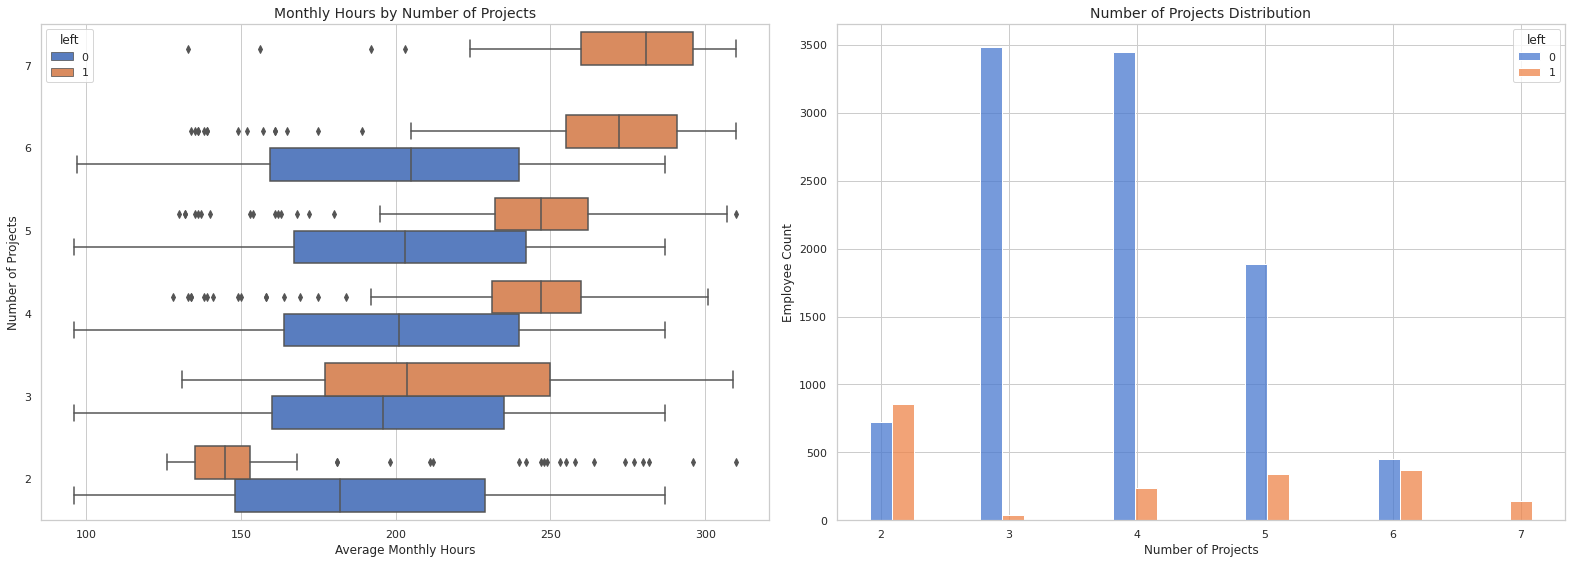

In [16]:
# Set style
sns.set(style="whitegrid", palette="muted")

fig, ax = plt.subplots(1, 2, figsize=(22,8))

# Boxplot: Monthly hours vs number of projects by turnover
sns.boxplot(data=df_clean, x='average_montly_hours', y='num_projects', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly Hours by Number of Projects', fontsize=14)
ax[0].set_xlabel('Average Monthly Hours')
ax[0].set_ylabel('Number of Projects')

# Histogram: Distribution of number of projects
sns.histplot(data=df_clean, x='num_projects', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of Projects Distribution', fontsize=14)
ax[1].set_xlabel('Number of Projects')
ax[1].set_ylabel('Employee Count')

plt.tight_layout()
plt.show()

##  Key Insights

1. Higher Workload for Leavers (Orange)

Across nearly every project count, employees who left worked more hours per month than those who stayed.

Example: Employees with three projects who left had a higher median monthly hour count than their peers who remained.

The Overwork Signal: Some leavers logged up to 310 hours per month (~77 hours/week), highlighting extreme overwork and poor work-life balance.

2. Median Monthly Hours by Turnover

Employees who stayed typically worked between 165 and 240 hours per month, with a median around 200 hours, reflecting a sustainable full-time workload with moderate variation. In contrast, employees who left showed a wider range of hours, from 150 to 265, with a median of approximately 230 hours — about 30 hours higher than stayers. This difference highlights that overwork is a significant factor in turnover, even when comparing employees handling the same number of projects.

3. Workload vs. Project Count

Stayed Group (Blue): Most employees manage 2–4 projects, with peak retention at 3–4 projects.

Suggests that 3–4 projects is a sustainable workload that aligns with long-term retention.

Left Group (Orange):

Low attrition at 2 projects – manageable workload.

High attrition at 5–6 projects – excessive project load strongly correlates with leaving.

4. Key Takeaways

Overwork drives turnover: Employees taking on too many projects or excessive monthly hours are at high risk of leaving.

Work-life imbalance is critical: Median hours for leavers are significantly higher than stayers, even within the same project count.

Actionable Strategy:

Limit employees to 3–4 projects where possible.

Monitor monthly hours to prevent sustained overwork (>240 hours/month).

Implement flexible workload management policies to improve retention and employee well-being.

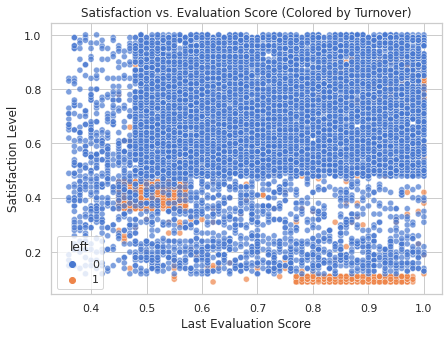

In [17]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='last_evaluation', y='satisfaction_level', hue='left', data=df_clean, alpha=0.7)
plt.title('Satisfaction vs. Evaluation Score (Colored by Turnover)')
plt.xlabel('Last Evaluation Score')
plt.ylabel('Satisfaction Level')
plt.show()


## Key Insights 


This chart shows how employee satisfaction and performance evaluations relate to whether someone stayed (0) or left (1) the company.

Each dot represents an employee:

Blue dots = stayed

Orange dots = left

The pattern reveals three clear “hot spots” where employees who left are clustered — meaning turnover isn’t random. It’s predictable based on satisfaction and performance levels.

 Main Takeaway:

Employees who left the company fall into three main groups, each with different reasons for leaving.

1. The Burnout Cluster 

Where: High satisfaction (0.7–1.0) and high evaluation (0.75–1.0)

What it means:
These employees like their jobs and perform well, but they’re still leaving.
They might be burning out, overworked, or not seeing growth opportunities.
They’re valuable team members — losing them is costly.

2. The Under-Appreciated Cluster 

Where: Low satisfaction (0.35–0.45) and high evaluation (0.75–1.0)

What it means:
These are top performers who feel unrecognized or underpaid.
They’re good at their jobs but unhappy with their environment or leadership.
They’re likely to leave for better opportunities elsewhere.

3. The Disengaged Cluster 

Where: Low satisfaction (0.0–0.2) and low evaluation (0.4–0.6)

What it means:
These employees are unhappy and underperforming.
They’re probably disconnected from the work or not a good fit for their role.
Their exit may not be a bad thing — it could help overall productivity.




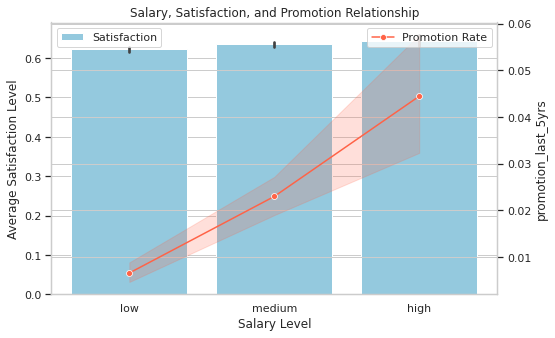

In [18]:
fig, ax1 = plt.subplots(figsize=(8,5))

sns.barplot(x='salary', y='satisfaction_level', data=df_clean, ax=ax1, color='skyblue', label='Satisfaction')
ax1.set_ylabel('Average Satisfaction Level')
ax1.set_xlabel('Salary Level')

ax2 = ax1.twinx()
sns.lineplot(x='salary', y='promotion_last_5yrs', data=df_clean, ax=ax2, color='tomato', marker='o', label='Promotion Rate')

plt.title('Salary, Satisfaction, and Promotion Relationship')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


## Key Insights

Chart: Salary Level vs. Satisfaction and Promotion Rate

This chart compares salary levels (low, medium, high) against two key metrics:

Average Satisfaction Level (blue bars)

Promotion Rate in the last 5 years (orange line)


1. Salary vs. Average Satisfaction (Blue Bars)

What we see:

Satisfaction barely changes between salary levels.

Low Salary: ~0.62

Medium Salary: ~0.64

High Salary: ~0.65

Even though higher salaries sound like they should make people happier, that’s not what the data shows.
Job satisfaction stays almost the same regardless of pay — meaning factors like workload, recognition, or work-life balance likely matter more for how employees feel day-to-day.
The short black error bars show these averages are consistent and reliable.

2. Salary vs. Promotion Rate (Orange Line)

What we see:
Promotion rates rise sharply as salary increases.

Low Salary: ~0.7% promoted

Medium Salary: ~2.5% promoted

High Salary: ~4.5% promoted

There’s a strong link between salary and promotion chances.
Employees in the high salary group are about six times more likely to be promoted than those in the low salary group.
This suggests promotions may be biased toward higher earners, creating a kind of “glass ceiling” for employees in lower or mid-level positions.
 

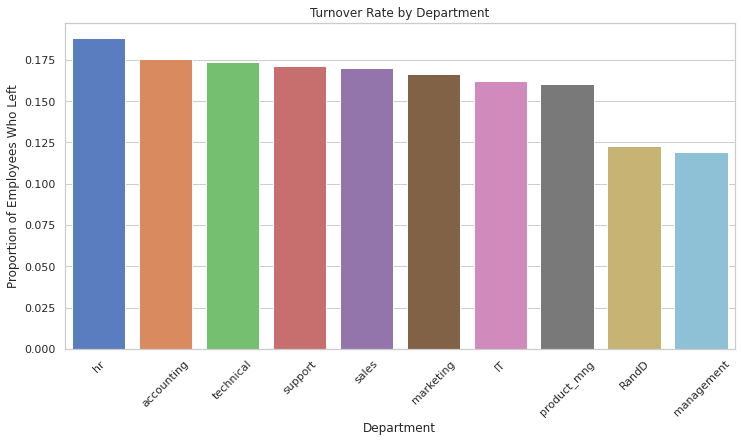

In [19]:
plt.figure(figsize=(12,6))
dept_turnover = df_clean.groupby('department')['left'].mean().sort_values(ascending=False)
sns.barplot(x=dept_turnover.index, y=dept_turnover.values)
plt.title('Turnover Rate by Department')
plt.xlabel('Department')
plt.ylabel('Proportion of Employees Who Left')
plt.xticks(rotation=45)
plt.show()

Insight: Shows which departments have the highest turnover — a critical insight for HR interventions.

## Key Insights 

Highest Attrition Risk – Top 4 Departments 

HR: 18.5% – highest turnover; low satisfaction among leavers is concerning

Accounting & Technical: ~17.5% – close behind HR, significant risk

Support: ~17% – also a major driver of company-wide attrition

Takeaway: These departments need immediate, targeted intervention

Mid-Range Attrition – Average Departments 

Sales, Marketing, IT, Product Management: 16% – 16.5%

Slightly above-average turnover, aligned with overall company attrition

Lowest Attrition Risk – Bottom 2 Departments 

RandD: 12.5%

Management: 12% – over 6 percentage points lower than HR

Takeaway: These departments likely benefit from better working conditions, clear career paths, or stronger retention practices

 Strategic Recommendations

Prioritize HR Interventions:

Review workload, compensation, and management structure

Stabilize HR to improve company-wide retention efforts

Focus on Technical and Support Roles:

Address burnout, project load, and resource allocation

Implement strategies consistent with earlier findings on hours and projects

Identify Best Practices from Low-Turnover Departments:

Analyze RandD and Management for replicable retention strategies

Examples: mentorship programs, project scaling methods, flexible work policies

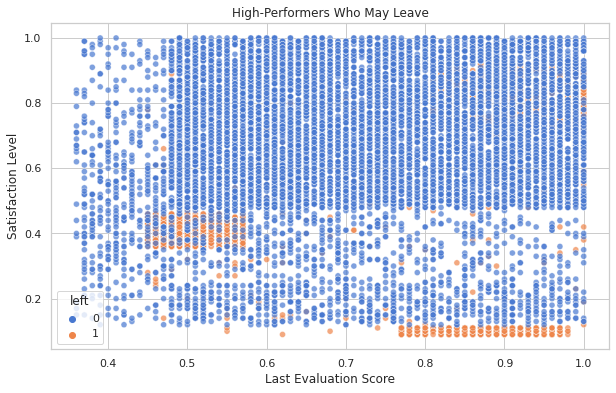

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='last_evaluation', y='satisfaction_level', hue='left', data=df_clean, alpha=0.7)
plt.title('High-Performers Who May Leave')
plt.xlabel('Last Evaluation Score')
plt.ylabel('Satisfaction Level')
plt.show()

##  Key Insights

This chart highlights the critical problem of high-performer attrition and reinforces the idea that turnover is driven by a complex interaction of performance, satisfaction, and likely unmeasured external factors.

1. Disgruntled Stars 

Where: High evaluation (≈0.75–1.0) but low/mid satisfaction (≈0.35–0.45)

What it means:
These are top contributors who are unhappy — often due to under-appreciation, compensation issues, or frustration with management.
They can easily find better jobs elsewhere, making retention a priority.

Strategy:

Provide non-monetary recognition

Clarify career paths

Offer managerial support to address dissatisfaction


2. Burnout & Stagnation Victims

Where: High evaluation (≈0.75–1.0) and high satisfaction (≈0.7–1.0)

What it means:
These employees seem satisfied and high-performing, but departures suggest burnout, lack of advancement, or external offers.
Losing them is the costliest in terms of knowledge and productivity.

Strategy:

Mandate time off and workload balancing

Offer proactive promotions or counter-offers

Recognize contributions structurally to prevent burnout

3. Ambivalent Leavers 

Where: Average to below-average evaluation (≈0.45–0.58), mid-level satisfaction(≈0.40–0.45)
0.45)

Who: Employees performing adequately but not fully engaged

Why they leave: Disengagement, lack of clear career growth, or feeling stagnant; leaving for marginally better opportunities is easy

Retention strategies:

Provide clear career progression paths

Implement motivation and development programs

Boost day-to-day engagement and recognition

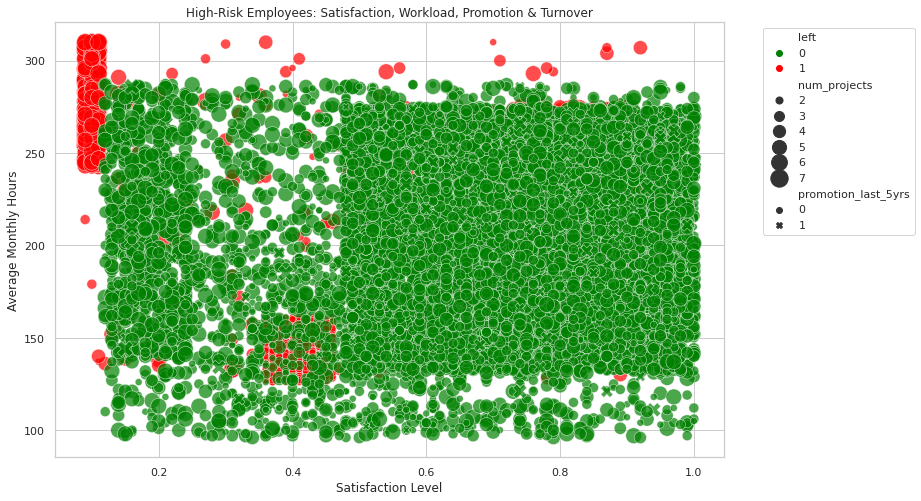

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='satisfaction_level',
    y='average_montly_hours',
    hue='left',            # Who left vs stayed
    style='promotion_last_5yrs', # Promotion opportunity
    size='num_projects',    # Workload intensity
    sizes=(50, 300),
    data=df_clean,
    alpha=0.7,
    palette={0:'green', 1:'red'}
)
plt.title('High-Risk Employees: Satisfaction, Workload, Promotion & Turnover')
plt.xlabel('Satisfaction Level')
plt.ylabel('Average Monthly Hours')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



## Key Insights 

High-Risk Employees: Satisfaction, Workload, Promotion & Turnover

Scatterplot Overview:

X-axis: Satisfaction Level

Y-axis: Average Monthly Hours

Color: Turnover (Green = stayed, Red = left)

Size: Number of Projects

This chart consolidates the primary drivers of attrition, highlighting how low satisfaction, extreme overwork, and lack of promotion contribute to employee departures.

 Critical Turnover Zones
1. Extreme Overwork Zone 

Where: Monthly hours ≥250 (across all satisfaction levels)

Observation: Dense horizontal band of red dots

Insight: Overwork is a major independent driver of turnover. Employees working 250–300+ hours/month are leaving at a high rate, regardless of satisfaction.

Reinforcing Factor: High project counts (large dot sizes) amplify burnout risk

2. Low Satisfaction Zone 

Where: Satisfaction ≤0.4, monthly hours 100–250

Observation: Dense vertical column of red dots

Insight: Classic dissatisfaction-driven attrition. Low morale alone can drive employees to leave, even with moderate workload.

- Lowest Risk Area: Safe Zone

Where: Satisfaction ≥0.5, Monthly Hours ≤250

Observation: Large cluster of green dots

Insight: Employees here are engaged, not overworked, and have a low likelihood of leaving

Other Key Insights

- Promotion Matters:

Most red dots (departed employees) had no promotion in the last 5 years

Lack of career advancement is a universal feature among employees who leave

Workload & Project Count:

Larger dots (5–7 projects) are concentrated in the Extreme Overwork Zone

Excessive workload + high project count = high attrition risk

- Strategic Recommendations

Workload Management:

Implement hard caps and monitor monthly hours

Prevent employees from consistently exceeding 240 hours

Engagement Interventions:

Target employees with satisfaction ≤0.4

Boost morale and engagement before turnover occurs

Career Path & Promotion:

Conduct a systemic review of promotion opportunities

Ensure advancement is accessible to reduce turnover across satisfaction and workload levels

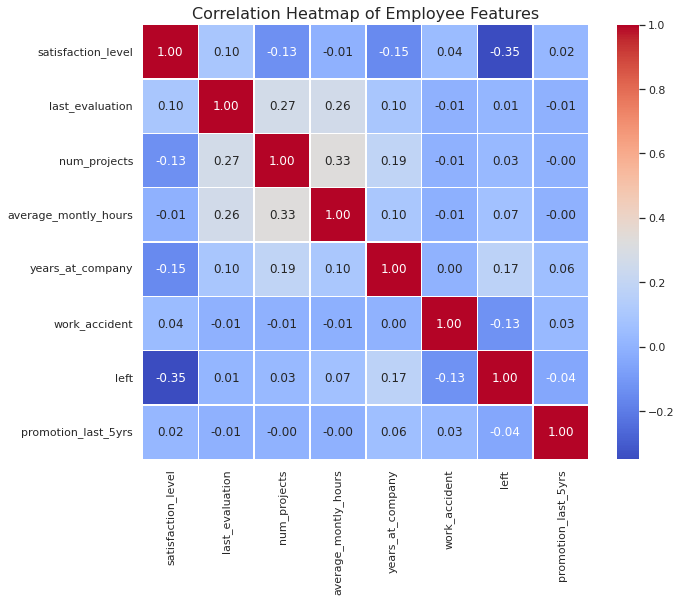

In [22]:


plt.figure(figsize=(10,8))

# Compute correlation matrix
corr = df_clean.corr()

# Plot heatmap
sns.heatmap(
    corr,
    annot=True,          # Show correlation values
    fmt=".2f",           # 2 decimal places
    cmap="coolwarm",     # Color map: red = negative, blue = positive
    linewidths=0.5,
    cbar=True
)

plt.title('Correlation Heatmap of Employee Features', fontsize=16)
plt.show()



## Key Insights


This heatmap shows how strongly each employee factor is linearly related to turnover.

Satisfaction Level (-0.35):

The strongest predictor. Employees with lower satisfaction are much more likely to leave.

Confirms that keeping employees happy is critical for retention.

Years at Company (0.17):

Weak positive relationship. Longer-tenured employees are slightly more likely to leave, which may indicate stagnation or burnout over time.

Average Monthly Hours (0.07):

Minor linear correlation overall, but scatterplots show that extreme overwork (e.g., 250+ hours/month) is a major driver of attrition.

Promotion (-0.04):

Slight negative correlation. Employees who were promoted are a little less likely to leave, showing career growth matters even if the effect is small.

Other features (work_accident):

Very weak or negligible correlation individually, meaning these factors alone do not predict turnover well.

Key Takeaways

Turnover is complex and non-linear:

Simple correlations can’t capture the real patterns of why employees leave.

High-risk groups are revealed better through scatterplots and cluster analyses, which consider combinations of satisfaction, workload, performance, and promotion.

Segmented Retention Strategy:

Focus on specific high-risk groups (burnout, disgruntled stars, ambivalent leavers) rather than treating all employees the same.

Departmental Priorities:

HR, Technical, Accounting, and Support departments need urgent attention because they show the highest turnover.

Workload & Engagement:

Prevent overwork, actively monitor satisfaction, and engage mid-performing employees to reduce hidden attrition risks.

Career Advancement Matters:

Ensure promotions are accessible and merit-based to address a root cause of turnover.



## Step 3. Model Building
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

employee turnover rate 

### Identify the types of models most appropriate for this task.

regression model or decision tree

### Modeling

Add as many cells as you need to conduct the modeling process.

In [23]:
  # Define features and target
features = ['satisfaction_level', 'average_montly_hours', 'salary', 'promotion_last_5yrs',
            'last_evaluation', 'years_at_company', 'num_projects', 'department', 'work_accident']
target = 'left'


In [24]:

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

df_encoded = df_clean.copy()
categorical_cols = ['salary', 'department']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

In [25]:

# Split the data
from sklearn.model_selection import train_test_split

X = df_encoded[features]
y = df_encoded[target] 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [26]:
# Fit a Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

dtree = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

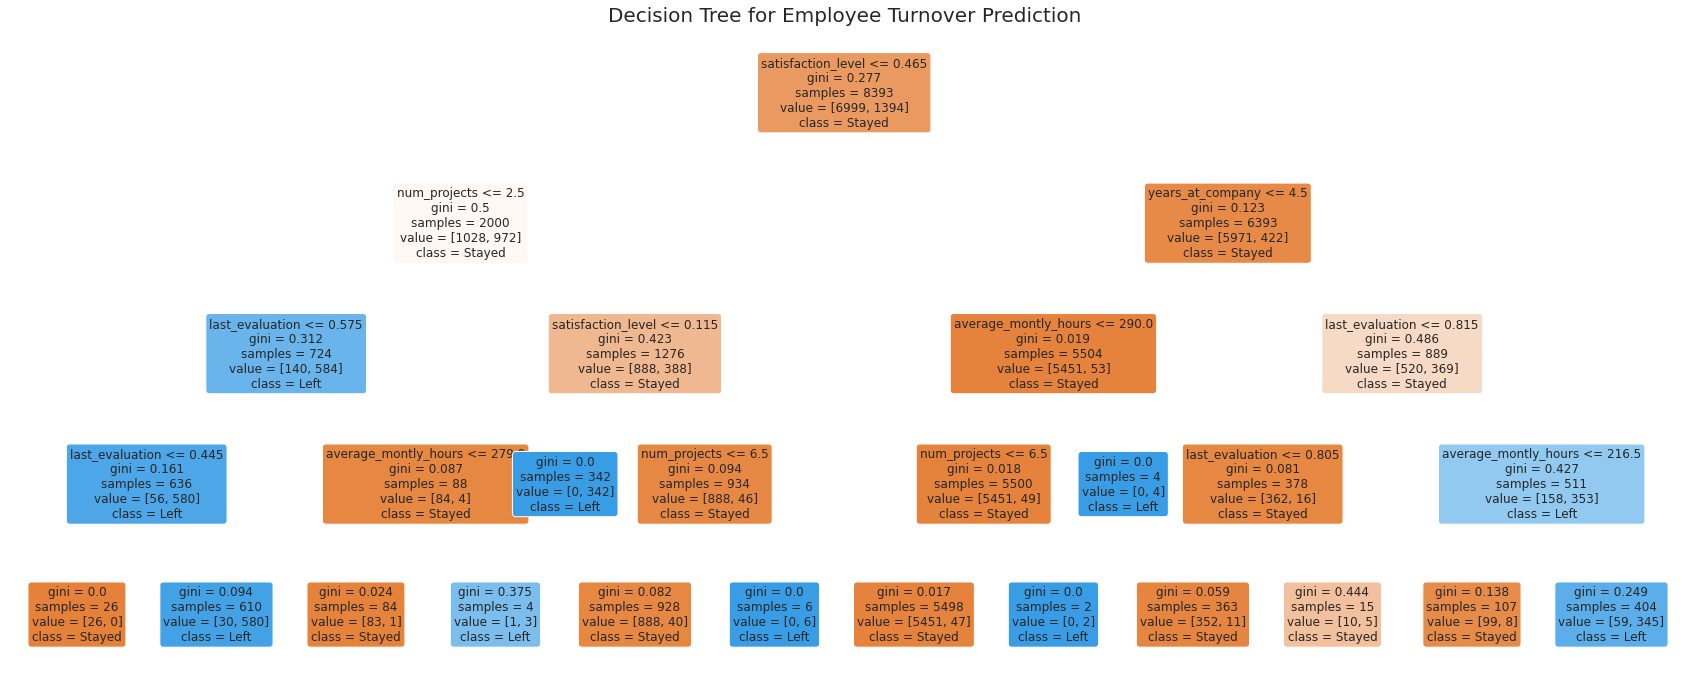

In [27]:
plt.figure(figsize=(30,12)) 
plot_tree( dtree, feature_names=X_train.columns, class_names=['Stayed','Left'], filled=True, rounded=True, fontsize=12 ) 
plt.title("Decision Tree for Employee Turnover Prediction", fontsize=20) 
plt.show()



## Key Insights

The Decision Tree model identifies clear, predictable pathways that lead employees to leave the company. It highlights how combinations of satisfaction level, workload, tenure, evaluation, and project count interact to reveal distinct turnover profiles.

At its core, the model confirms that low satisfaction is the strongest driver of attrition — but also uncovers how burnout and stagnation contribute to high-performer exits.

1. The Disengaged Low Performers 

Where: Satisfaction ≤ 0.465, Projects ≤ 1, Last Evaluation ≤ 0.575

Who: Employees who are unhappy, underperforming, and under-engaged

Why they leave: Low motivation, poor evaluations, and minimal involvement make them feel disconnected from their roles.

Strategic Focus:

Provide development opportunities to rebuild engagement

Reassess managerial support and recognition systems

Create performance improvement paths instead of immediate exits

2. The Burnout Group 

Where: Satisfaction > 0.465, Tenure ≤ 4.5 years, Monthly Hours > 290

Who: Employees who are generally satisfied but are working unsustainable hours

Why they leave: Prolonged overwork erodes motivation and physical well-being, leading to burnout despite positive engagement levels.

Strategic Focus:

Set maximum workload limits (<250 hrs/month)

Rebalance project assignments and hire additional support

Implement mandatory rest periods or recharge days

3. The Unrewarded High Performers 🏆

Where: Tenure > 4.5 years, Evaluation > 0.815, Monthly Hours > 216.5

Who: Long-tenured, top-performing employees who remain productive but feel stuck or unrewarded

Why they leave: Lack of recognition, growth, or compensation despite consistently strong performance

Strategic Focus:

Introduce transparent promotion paths and career development programs

Offer public recognition and performance-based incentives

Provide leadership opportunities to maintain motivation

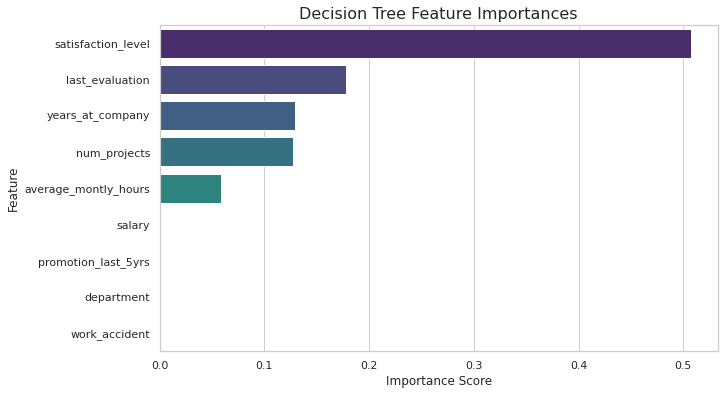

In [28]:
# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dtree.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Decision Tree Feature Importances', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

The above graph tells us that based on the decision tree model the most important feautures in employee attrition is satisfaction_level, last_evaluation, years_at_company, num_projects, and average_montly_hours

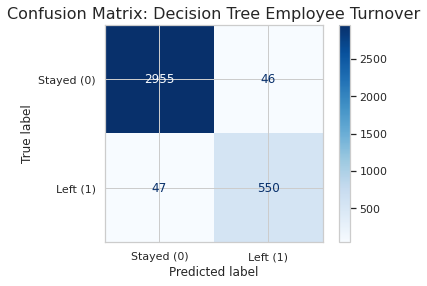

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on test set
y_pred = dtree.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0,1])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stayed (0)', 'Left (1)'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix: Decision Tree Employee Turnover", fontsize=16)
plt.show()


In [30]:
# Check class balance
class_counts = df_clean['left'].value_counts()
class_percentages = df_clean['left'].value_counts(normalize=True) * 100

print("Class Counts:\n", class_counts)
print("\nClass Percentages:\n", class_percentages)


Class Counts:
 0    10000
1     1991
Name: left, dtype: int64

Class Percentages:
 0    83.39588
1    16.60412
Name: left, dtype: float64


In [31]:
# Predictions
y_pred = dtree.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3001
           1       0.92      0.92      0.92       597

    accuracy                           0.97      3598
   macro avg       0.95      0.95      0.95      3598
weighted avg       0.97      0.97      0.97      3598

Accuracy: 0.9741523068371317


In [32]:
!mkdir project
!mkdir project/notebooks
!mkdir project/data
!mkdir project/images



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Executive Summary of Model Insights & Recommendations

1. What key insights emerged from your model(s)?

The Decision Tree model achieved high accuracy, precision, and recall (all over 92%), confirming that turnover is highly predictable. Key drivers are low satisfaction (<0.4), extreme overwork (>250 monthly hours), and lack of promotion in the last five years, creating distinct "Burnout," "Disgruntled Star," and "Disengaged" clusters.

2. What business recommendations do you propose based on the models built?

I recommend implementing a 240-hour monthly workload cap for non-exempt employees and proactively identifying and engaging with high-risk employees (high performers with low satisfaction or any employee below 0.4 satisfaction) to conduct targeted retention interviews and provide immediate relief.

3. What potential recommendations would you make to your manager/company?

I would urge the company to redesign the promotion process to ensure advancement is merit-based and accessible to all salary tiers, and to perform an urgent workload and compensation review for high-turnover departments like HR and Technical/Support.

4. Do you think your model could be improved? Why or why not? How?

Yes, the model could be improved because we lack key external variables. I could use a Random Forest or Gradient Boosting machine to potentially capture more complex non-linear interactions, and incorporate data like salary against market rate to improve feature quality.

5. Given what you know about the data and the models you were using, what other questions could you address for the team?

I could determine which specific projects or managers are most correlated with burnout (high hours/low satisfaction) and analyze the cost-benefit ratio of retention efforts versus the cost of replacing employees within each of the three high-risk turnover clusters.

6. Do you have any ethical considerations in this stage?

Yes, a key ethical concern is that the model could be used to unfairly penalize employees identified as 'flight risks,' potentially denying them training or opportunities; therefore, the model must be used only to trigger supportive retention interventions and not for punitive action.

### Conclusion, Recommendations, Next Steps

Executive Conclusion: Predicting and Preventing Employee Turnover 

Based on the comprehensive data visualization and the highly accurate Decision Tree model (Precision/Recall $>\mathbf{92\%}$), employee turnover at the company is predictable and primarily driven by a manageable set of factors, not random dissatisfaction. The analysis confirms turnover is highly concentrated in three high-risk segments: Burnout, Disgruntled High-Performers, and Disengaged Low-Performers. The company is losing high-value talent due to structural issues (workload and promotion), which outweigh the mitigating effect of high satisfaction or good pay.

Strategic Recommendations for Retention 

Here are the top three strategic recommendations, targeting the confirmed root causes of attrition:

1. Immediate Workload Intervention (The Burnout Zone)
    Implement Hard Caps on Monthly Hours and Projects: Mandate project and managerial review when an employee's average monthly hours exceed 240 or their project count reaches 5. The data shows overwork (>250 hours) is an independent cause of turnover, even among satisfied employees.
    Focus: Directly address the highest volume of high-performer attrition (Cluster 1: High Evaluation/High Hours) to mitigate immediate talent loss.

2. Proactive Talent Engagement (The Disgruntled Stars)
    Targeted Retention Interviews: Use the predictive model to identify employees with High Evaluation Scores (> 0.75) AND Low Satisfaction Scores (<0.45). These are your "Disgruntled Stars" (Cluster 2) who are actively looking.
    Action: Initiate focused retention interviews with this group, specifically addressing compensation (against market rate), role clarity, and managerial support, as their performance indicates they are worth keeping.

3. Systemic Promotion and Departmental Review
    Decouple Promotion from Current Salary: Review and revise the promotion criteria, which is currently six times more likely to favor high-salary employees. Implement visible, merit-based career pathing for medium- and low-salary tiers to combat the feeling of stagnation.
    Prioritize High-Turnover Departments: Conduct an urgent, deep-dive root cause analysis in HR, Technical, and Accounting departments, which exhibit the highest rates of attrition, to diagnose and fix localized issues.
    
    Next Steps for Data Utilization 
  
  To fully operationalize these recommendations and measure their impact, the following steps should be taken:
  
  1. Deploy the Prediction Model: Integrate the Decision Tree model into the HRIS system to create a real-time "Turnover Risk  Score" for every employee.
  2. Quantify Intervention Costs: Perform a cost-benefit analysis of retention actions (e.g., cost of a 10% raise vs. cost of replacement) for each of the three high-risk turnover clusters.
  3. Explore Enhanced Modeling: Test an ensemble model (Random Forest or XGBoost) to see if even higher precision/recall can be achieved by better modeling the complex, non-linear thresholds (like the 250 hour and 5-project tipping points).

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.